## Project:

Business Objective:

The fundamental goal here is to model the CO2 emissions as a function of several car engine features.

Data Set Details: 

The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. In that way, this problem has the 12 

following variables:

make, car brand under study.
model, the specific model of the car.
vehicle_class, car body type of the car.
engine_size, size of the car engine, in Liters.
cylinders, number of cylinders.
transmission, "A" for`Automatic', "AM" for ``Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable', "M" for 'Manual'.
fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'.
fuel_consumption_city, City fuel consumption ratings, in liters per 100 kilometers.
fuel_consumption_hwy, Highway fuel consumption ratings, in liters per 100 kilometers.
fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km.
fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg).
co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer.

Acceptance Criterion: Need to deploy the end results using Flask /Streamlit etc

In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV ,RandomizedSearchCV ,cross_val_score ,KFold
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge , ElasticNet 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib.pyplot as plt


# **EDA (Exploratory Data Analysis)**

**Understand the dataset by summarizing, visualizing, and identifying patterns, correlations, and anomalies.**

## 1. Load Data

In [3]:
#read the dataset
data = pd.read_csv('co2_emissions (1).csv')

In [4]:
## Basic Information & Summary

In [5]:
#Display first 5 records
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [8]:
#dispaly random 5 sample
data.sample(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
3275,VOLKSWAGEN,JETTA,COMPACT,1.8,4,M,X,9.4,6.4,8.1,35,189
5479,ASTON MARTIN,Vantage V8,TWO-SEATER,4.0,8,A,Z,12.7,9.4,11.2,25,264
435,GMC,SAVANA 1500 CARGO,VAN - CARGO,5.3,8,A,X,18.0,13.4,15.9,18,366
2285,BMW,340i xDRIVE,COMPACT,3.0,6,M,Z,11.9,8.3,10.3,27,241
6498,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.3,7.5,9.0,31,211


##  2. Understand the Data

In [9]:
#size of rows and columns
data.shape

(7385, 12)

In [10]:
# Get information about columns types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [11]:
# Get basic statistical details of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [12]:
# Basic statistics summary of Object features
data.describe(include= 'object').T

,count,unique,top,freq
make,7385,42,FORD,628
model,7385,2053,F-150 FFV 4X4,32
vehicle_class,7385,16,SUV - SMALL,1217
transmission,7385,5,AS,3127
fuel_type,7385,5,X,3637


In [13]:
##Get features names
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [14]:
# checking duplicate values
data.duplicated().sum()

1112

In [15]:
#check for missing data
data.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [16]:
# percentage of missing values
data.isna().sum()/len(data)*100 

make                              0.0
model                             0.0
vehicle_class                     0.0
engine_size                       0.0
cylinders                         0.0
transmission                      0.0
fuel_type                         0.0
fuel_consumption_city             0.0
fuel_consumption_hwy              0.0
fuel_consumption_comb(l/100km)    0.0
fuel_consumption_comb(mpg)        0.0
co2_emissions                     0.0
dtype: float64

## 3.Univariate, Bivariate & Multivariate Analysis 

**Histogram & Barplot**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


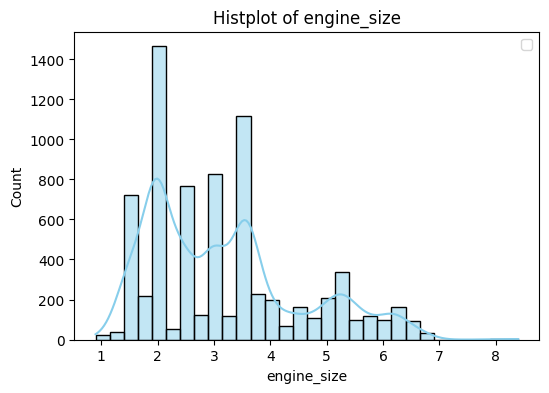

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


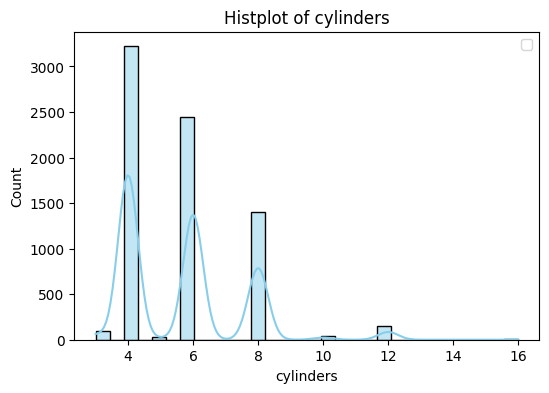

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


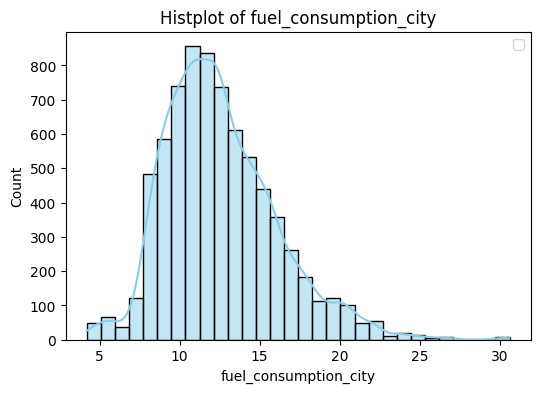

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


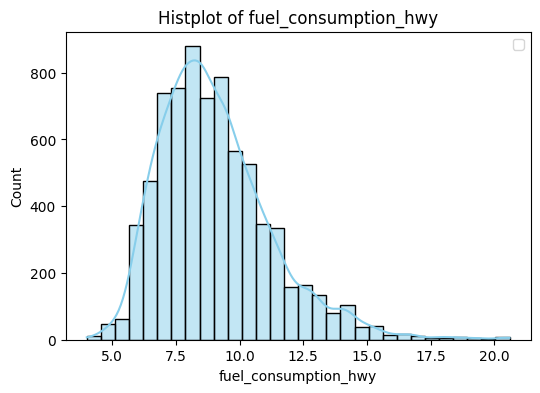

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


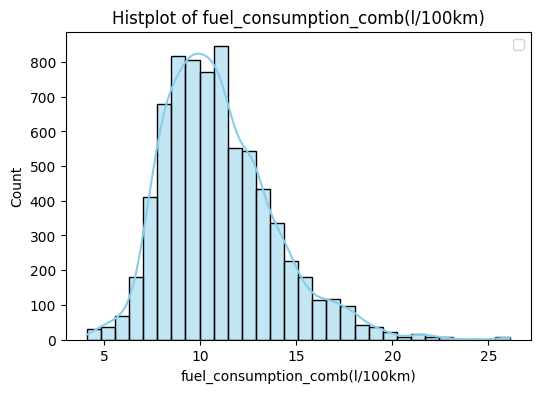

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


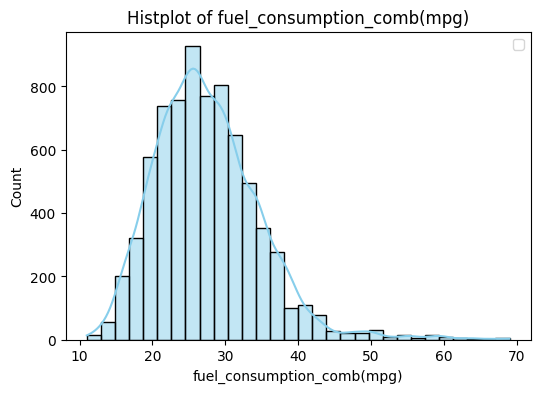

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


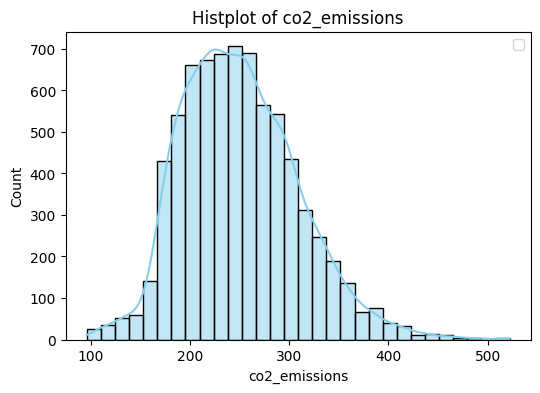

In [32]:
#Check Distribution of Numerical Data
# Select numerical columns
num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE for each numerical column
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color="skyblue")
    plt.title(f'Histplot of {col}')
    plt.legend()
    plt.show()

**Skewness**

In [18]:
# Check skewness of numerical features

# Select only numerical columns
num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness
skewness_values = data[num_col].skew()

# Display skewness values
print("Skewness of numerical columns:\n", skewness_values)

Skewness of numerical columns:
 engine_size                       0.809181
cylinders                         1.110415
fuel_consumption_city             0.809005
fuel_consumption_hwy              1.079217
fuel_consumption_comb(l/100km)    0.893316
fuel_consumption_comb(mpg)        0.977034
co2_emissions                     0.526094
dtype: float64


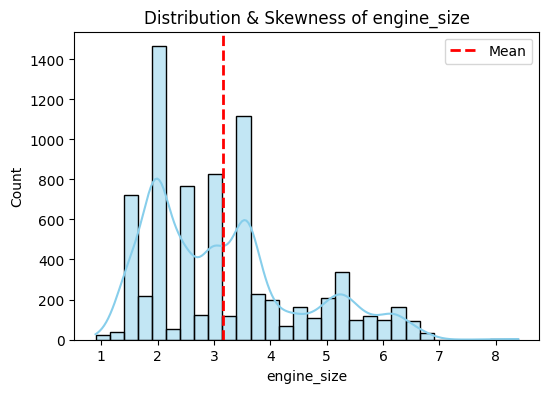

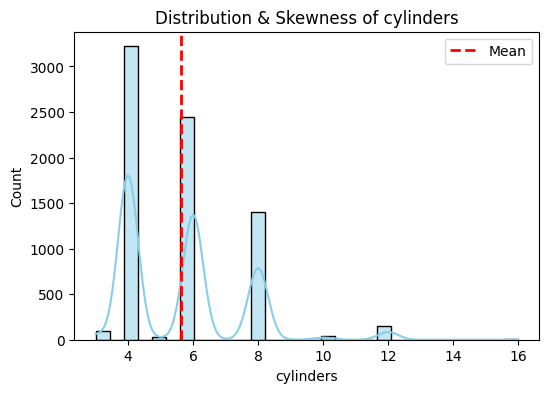

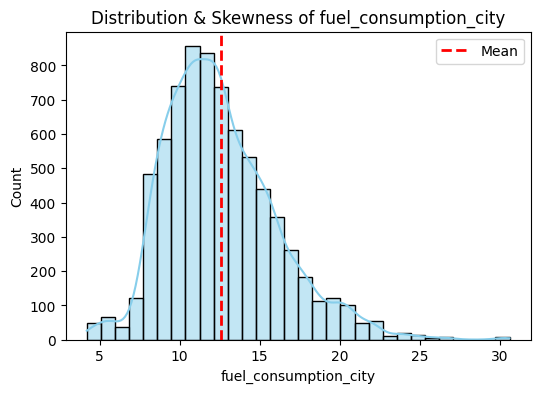

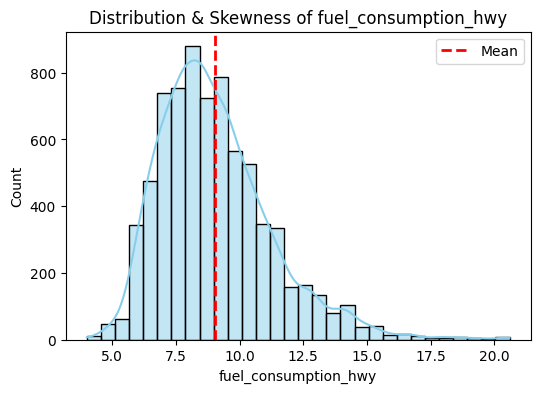

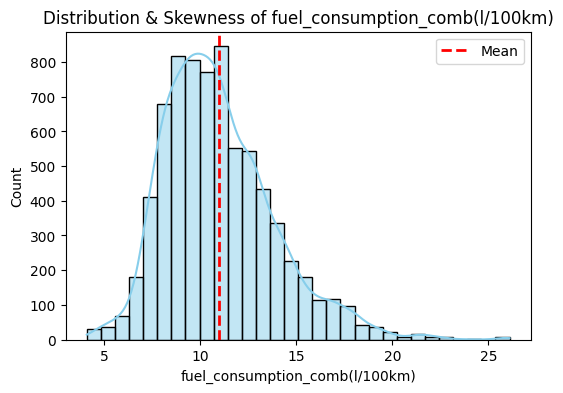

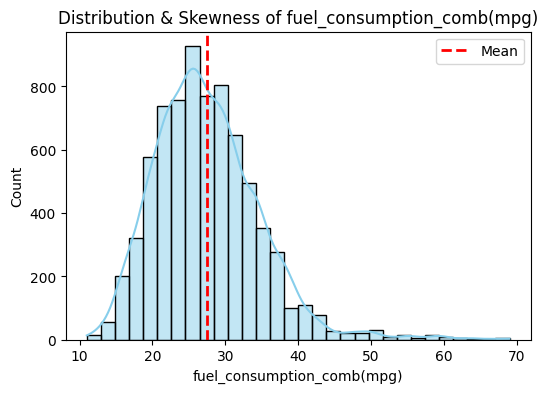

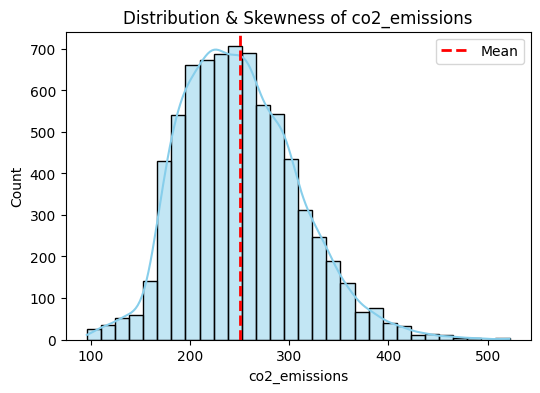

In [33]:
#Identify Sknewness
# Select numerical columns
num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE for each numerical column
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution & Skewness of {col}')
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.legend()
    plt.show()

In [ ]:
# Categorical features

In [34]:
#Brands od cars
print("We have total",len(data['make'].unique()),"Car Companies Data")
df_brand = data['make'].value_counts().reset_index().rename(columns={'count':'Count'})
df_brand.head(20)

We have total 42 Car Companies Data


,make,Count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


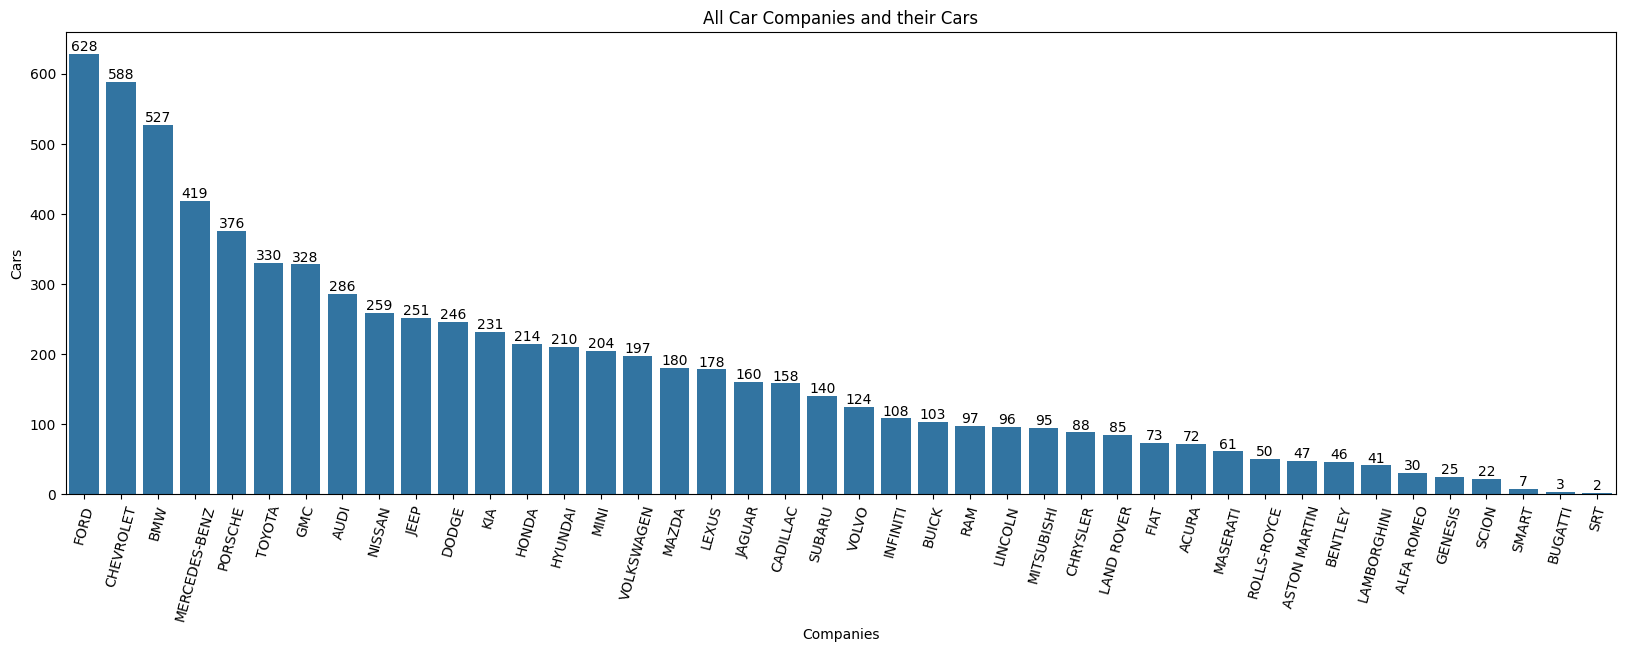

In [35]:
plt.figure(figsize=(20,6))
fig1 = sns.barplot(data = df_brand, x = "make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(fig1.containers[0])
plt.show()

In [36]:
#Models of cars 
print("We have total",len(data['model'].unique()),"Car Models")
df_model = data['model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head(20)

We have total 2053 Car Models


,model,Count
0,F-150 FFV 4X4,32
1,F-150 FFV,32
2,MUSTANG,27
3,FOCUS FFV,24
4,SONIC,20
5,SONIC 5,20
6,F-150 4X4,20
7,F-150,20
8,ACCORD,19
9,COMPASS,19


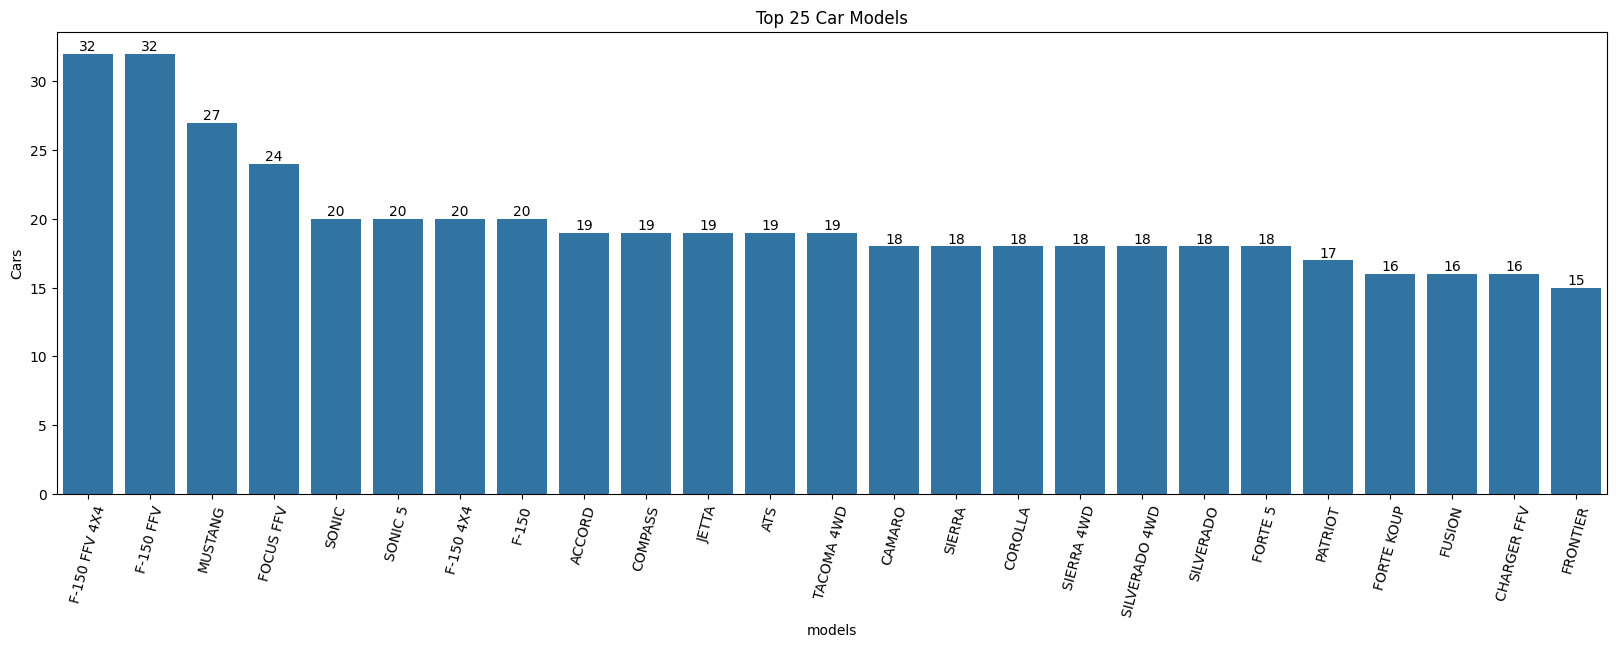

In [37]:
plt.figure(figsize=(20,6))
fig2 = sns.barplot(data = df_model, x = "model",  y= "Count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("models")
plt.ylabel("Cars")
plt.bar_label(fig2.containers[0])
plt.show()

In [19]:
#Vehicle Class
print("We have total",len(data['vehicle_class'].unique()),"vehicle_class")
df_vehicle_class = data['vehicle_class'].value_counts().reset_index().rename(columns={'count':'Count'})
df_vehicle_class

We have total 16 vehicle_class


,vehicle_class,Count
0,SUV - SMALL,1217
1,MID-SIZE,1133
2,COMPACT,1022
3,SUV - STANDARD,735
4,FULL-SIZE,639
5,SUBCOMPACT,606
6,PICKUP TRUCK - STANDARD,538
7,TWO-SEATER,460
8,MINICOMPACT,326
9,STATION WAGON - SMALL,252


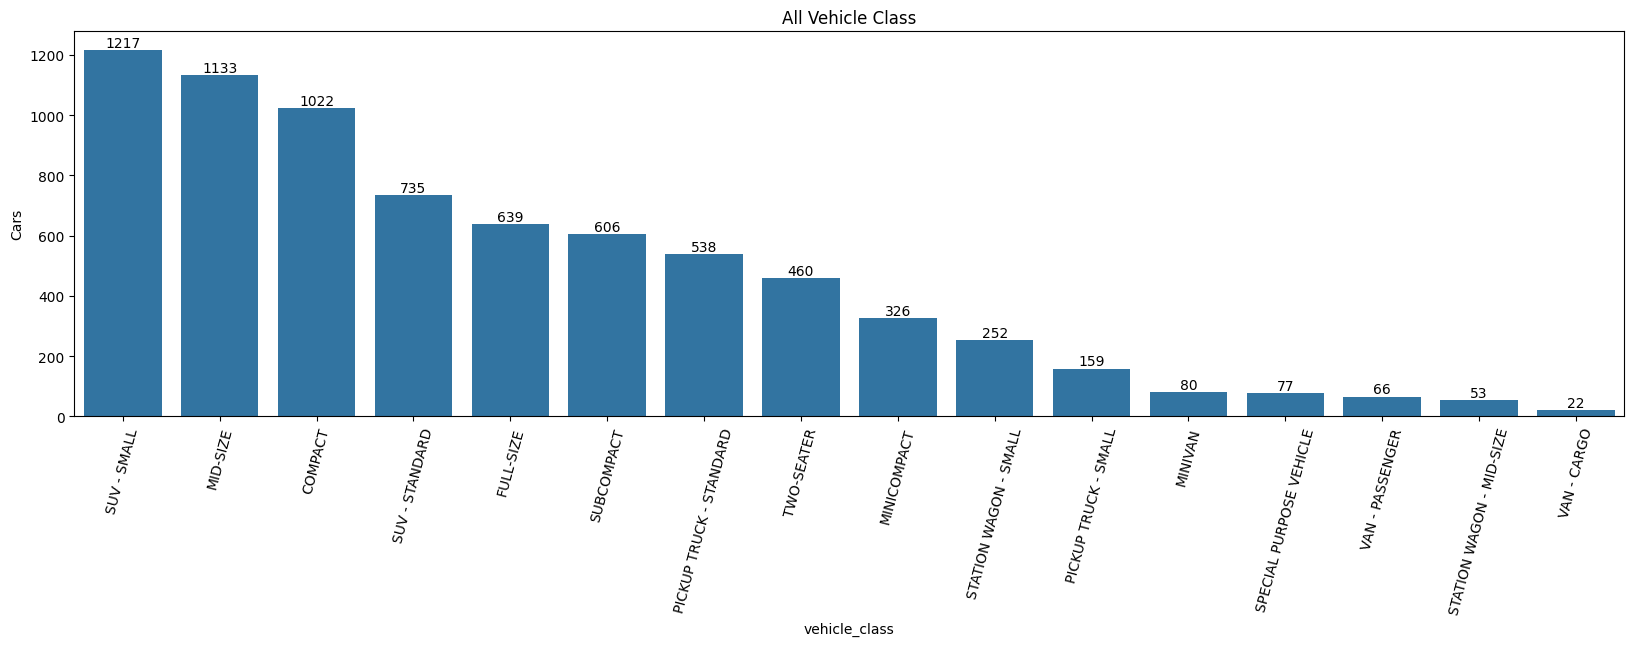

In [38]:
plt.figure(figsize=(20,5))
fig3 = sns.barplot(data = df_vehicle_class, x = "vehicle_class",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("vehicle_class")
plt.ylabel("Cars")
plt.bar_label(fig3.containers[0])
plt.show()

In [39]:
#Engine Sizes of cars
print("We have total",len(data['engine_size'].unique()),"Types of Engine Size")
df_engine_size = data['engine_size'].value_counts().reset_index().rename(columns={'count':'Count'})
df_engine_size.head(10)

We have total 51 Types of Engine Size


,engine_size,Count
0,2.0,1460
1,3.0,804
2,3.6,536
3,3.5,529
4,2.5,423
5,2.4,346
6,1.6,302
7,5.3,290
8,1.8,216
9,1.4,211


In [ ]:
plt.figure(figsize=(20,6))
fig4 = sns.barplot(data = df_engine_size, x = "engine_size",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("engine_size")
plt.ylabel("Cars")
plt.bar_label(fig4.containers[0])
plt.show()

In [ ]:
#Cylinders
print("We have total",len(data['cylinders'].unique()),"Types of Cylinders")
df_cylinders = data['cylinders'].value_counts().reset_index().rename(columns={'count':'Count'})
df_cylinders.head(10)

In [ ]:
plt.figure(figsize=(20,6))
fig5 = sns.barplot(data = df_cylinders, x = "cylinders",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("cylinders")
plt.ylabel("Cars")
plt.bar_label(fig5.containers[0])
plt.show()

In [40]:
## Transmission of Cars 
data['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [41]:
#Here we have to map similar labels into a single label for our Transmission column.
data["transmission"] = np.where(data["transmission"].isin(["A"]), "Automatic", data["transmission"])
data["transmission"] = np.where(data["transmission"].isin(["AM"]), "Automated Manual", data["transmission"])
data["transmission"] = np.where(data["transmission"].isin(["AS"]), "Automatic with Select Shift", data["transmission"])
data["transmission"] = np.where(data["transmission"].isin(["AV"]), "Continuously Variable", data["transmission"])
data["transmission"] = np.where(data["transmission"].isin(["M"]), "Manual", data["transmission"])

In [20]:
print("We have total",len(data['transmission'].unique()),"transmissions")
df_transmission = data['transmission'].value_counts().reset_index().rename(columns={'count':'Count'})
df_transmission

We have total 5 transmissions


,transmission,Count
0,AS,3127
1,A,1851
2,M,1185
3,AM,646
4,AV,576


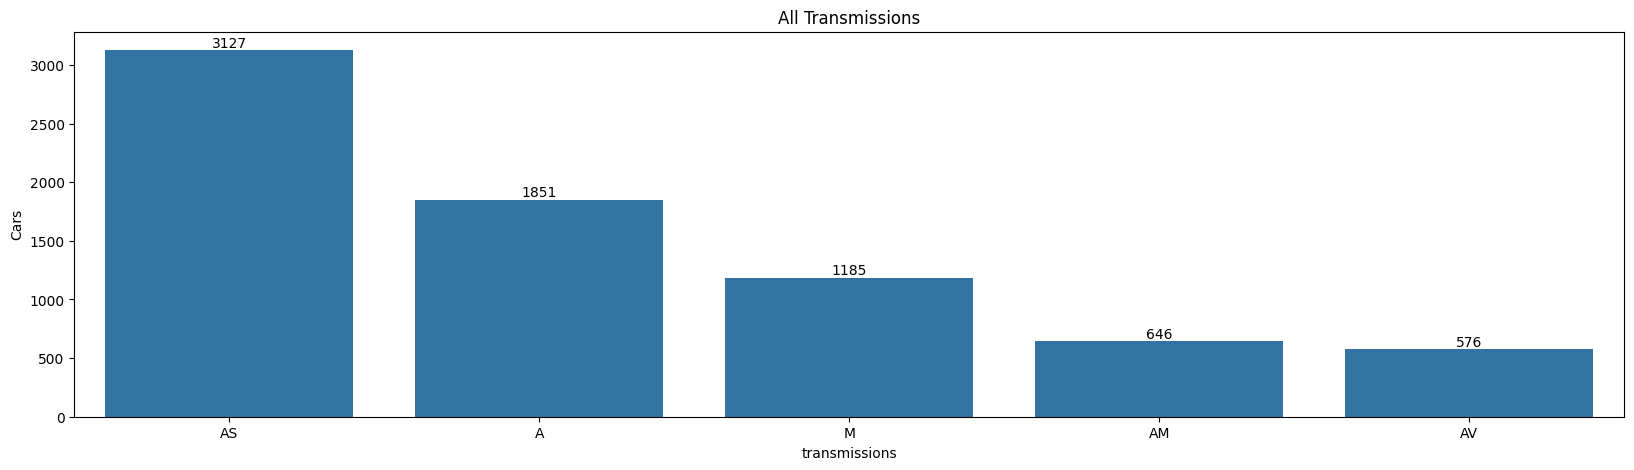

In [42]:
plt.figure(figsize=(20,5))
fig6 = sns.barplot(data = df_transmission, x = "transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("transmissions")
plt.ylabel("Cars")
plt.bar_label(fig6.containers[0])
plt.show()

In [ ]:
#Fuel Type of Cars
data['fuel_type'].unique()

In [ ]:
#Here we have to map similar labels into a single label for our Fuel Type column
data["fuel_type"] = np.where(data["fuel_type"]=="Z", "Premium Gasoline", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="X", "Regular Gasoline", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="D", "Diesel", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="E", "Ethanol(E85)", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="N", "Natural Gas", data["fuel_type"])

In [ ]:
print("We have total",len(data['fuel_type'].unique()),"fuel_type")
df_fuel_type = data['fuel_type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_fuel_type

In [ ]:
plt.figure(figsize=(20,5))
fig7 = sns.barplot(data = df_fuel_type, x = "fuel_type",  y= "Count")
plt.title("All Fuel Types")
plt.xlabel("fuel_type")
plt.ylabel("Cars")
plt.bar_label(fig7.containers[0])
plt.show()

### Variation in CO2 emissions with different features

### Co2 Emission with Brand

In [ ]:
df_co2_make = data.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

In [ ]:
plt.figure(figsize=(20,5))
fig8 = sns.barplot(data = df_co2_make, x = "make",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("co2_emissions")
plt.bar_label(fig8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

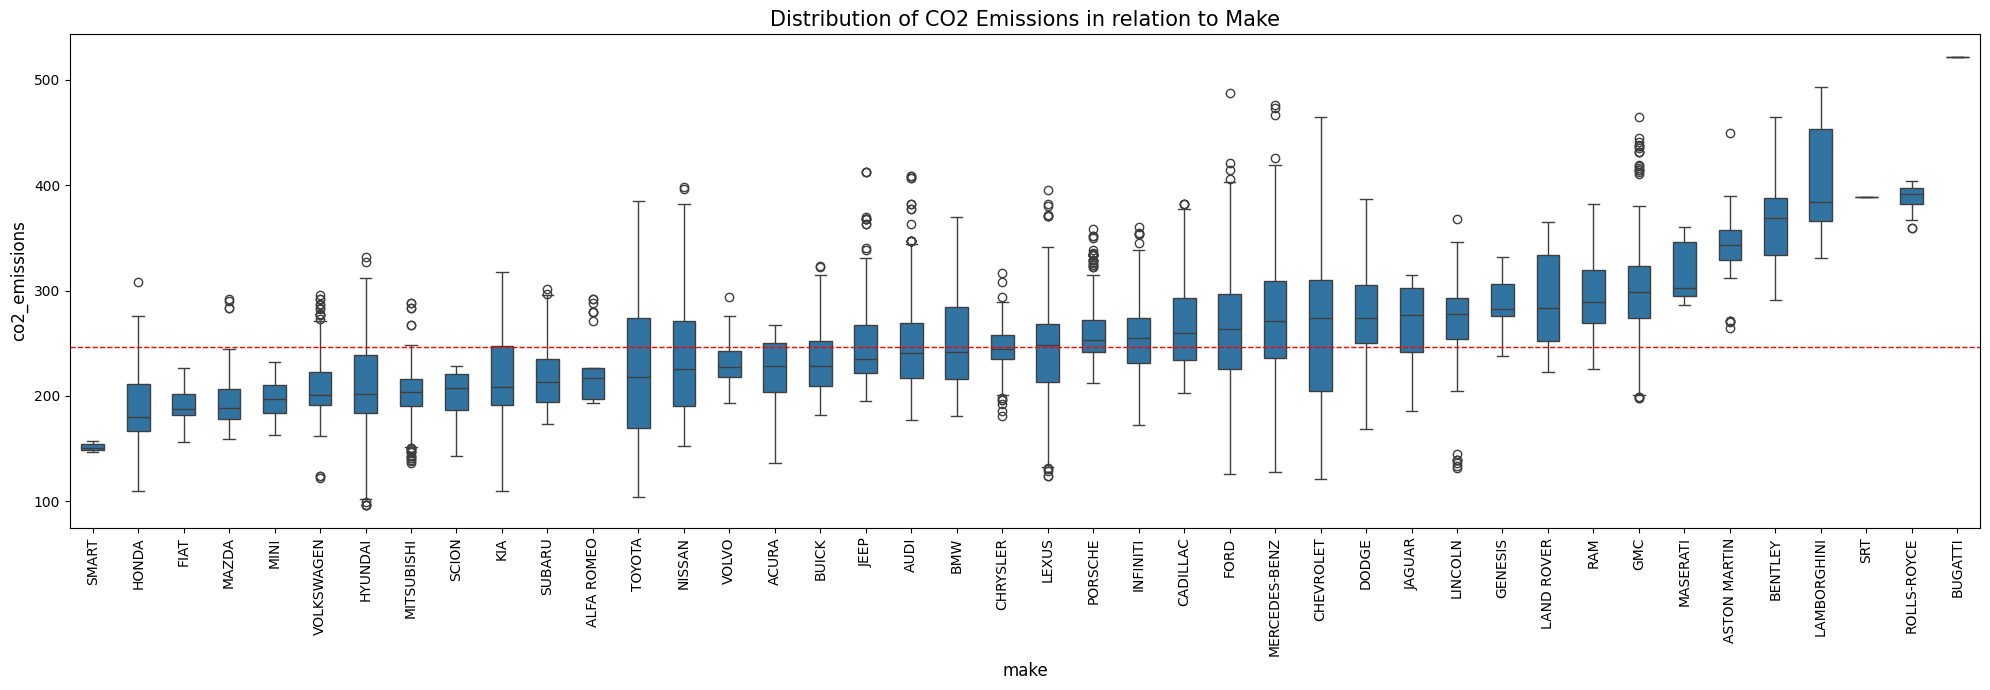

In [43]:
plt.figure(figsize=(20,7))
order = data.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("make", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(data["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### CO2 Emissions variation with Vehicle Class

In [ ]:
 
df_co2_vehicle_class = data.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

In [ ]:
plt.figure(figsize=(23,5))
fig9 = sns.barplot(data = df_co2_vehicle_class, x = "vehicle_class",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("vehicle_class")
plt.ylabel("co2_emissions)")
plt.bar_label(fig9.containers[0], fontsize=9)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
order = data.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("vehicle_class", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(data["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### CO2 Emissions variation with Transmission

In [ ]:

df_co2_transmission = data.groupby(['transmission'])['co2_emissions'].mean().sort_values().reset_index()

In [ ]:
fig10 = sns.barplot(data = df_co2_transmission, x = "transmission",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("transmission")
plt.ylabel("co2_emissions")
plt.bar_label(fig10.containers[0], fontsize=10)
plt.show()    

In [ ]:
plt.figure(figsize=(20,7))
order = data.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("transmission", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(data["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### CO2 Emissions variation with Fuel Type

In [ ]:
df_co2_fuel_type = data.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()

In [ ]:
plt.figure(figsize=(23,5))
fig11 = sns.barplot(data = df_co2_fuel_type, x = "fuel_type",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("fuel_type")
plt.ylabel("co2_emissions")
plt.bar_label(fig11.containers[0], fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
order = data.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=data, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("fuel_type", fontsize=12)
plt.ylabel("co2_emissions", fontsize=12)
plt.axhline(data["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### Correlation between numerical features

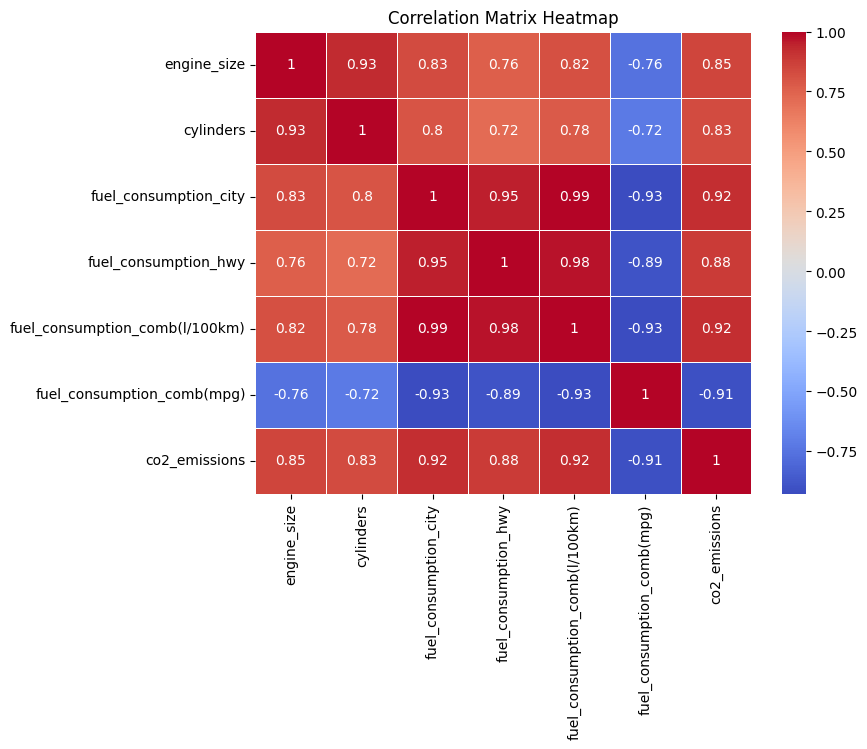

In [44]:
#Heatmap of Correlations
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[num_cols].corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### **Scatter Plot (Numerical vs. Numerical)**

In [ ]:
#colors = ["blue" if x < 250 else "red" for x in data["co2_emissions"]]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["engine_size"], y=data["co2_emissions"],hue=data['fuel_type'], palette='Set1',alpha=0.7,edgecolor='w')

plt.xlabel("Engine size")
plt.ylabel("CO₂ Emissions")
plt.title("Engine Size vs CO₂ Emissions by Fuel type")
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["fuel_consumption_hwy"], y=data["co2_emissions"], hue=data['fuel_type'], palette='Set1', alpha=0.7)

plt.xlabel("Fuel Consumption (Highway)")
plt.ylabel("CO₂ Emissions")
plt.title("Fuel Consumption (Highway) vs CO₂ Emissions by Fuel type")
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x=data["fuel_consumption_city"], y=data["co2_emissions"],hue=data['vehicle_class'], palette='Set1', alpha=0.7,edgecolor='w')

plt.xlabel("Fuel Consumption (city)")
plt.ylabel("CO₂ Emissions")
plt.title("Fuel Consumption (city) vs CO₂ Emissions By Vehicle class")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot( x=data["fuel_consumption_comb(l/100km)"],y=data["co2_emissions"],hue=data["vehicle_class"],  palette="Set1",alpha=0.7,edgecolor="w")

plt.xlabel("Fuel Consumption comb (L/100km)")
plt.ylabel("CO₂ Emissions")
plt.title("Fuel Consumption vs CO₂ Emissions by Vehicle Class")

plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["fuel_consumption_comb(mpg)"], y=data["co2_emissions"], hue=data["fuel_type"], palette = 'Set1', alpha=0.7,edgecolor='w')

plt.xlabel("Fuel Consumption comb(mpg)")
plt.ylabel("CO₂ Emissions")
plt.title("Fuel Consumption comb(mpg) vs CO₂ Emissions by fuel_type")
plt.show()

In [ ]:
# Create pairplot with hue
sns.pairplot(data, hue="fuel_type", palette="coolwarm")

plt.show()

In [ ]:
sns.pairplot(data, vars=["engine_size", "fuel_consumption_hwy", "co2_emissions"], hue="vehicle_class", palette="coolwarm")
plt.show()

In [ ]:
sns.pairplot(data, hue="engine_size", palette="coolwarm", diag_kind="kde")

plt.show()


## 4. Identify Outliers

<Figure size 1200x600 with 0 Axes>

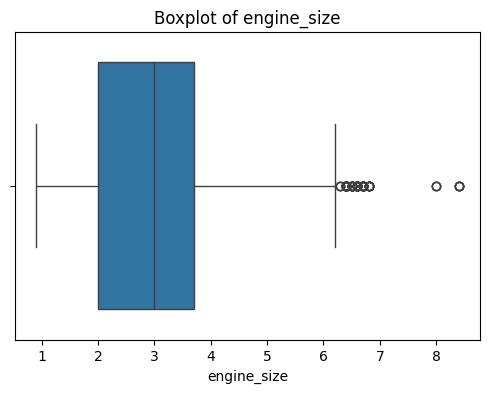

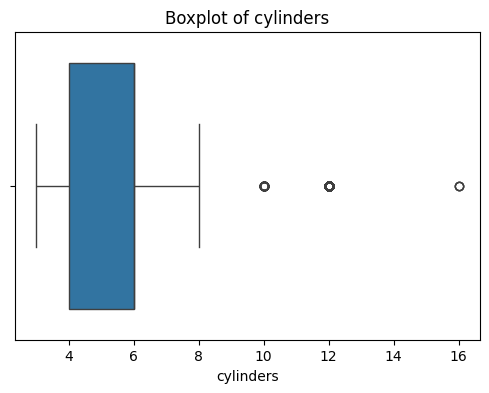

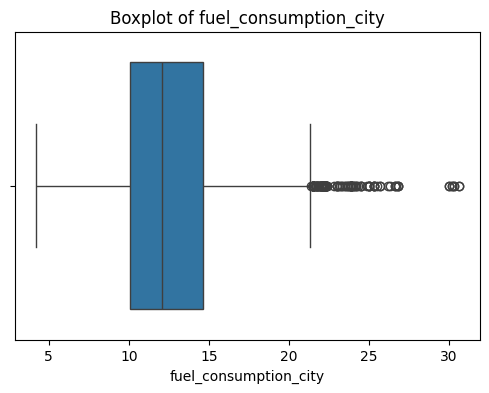

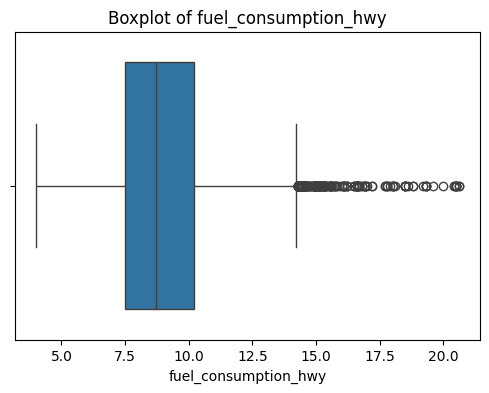

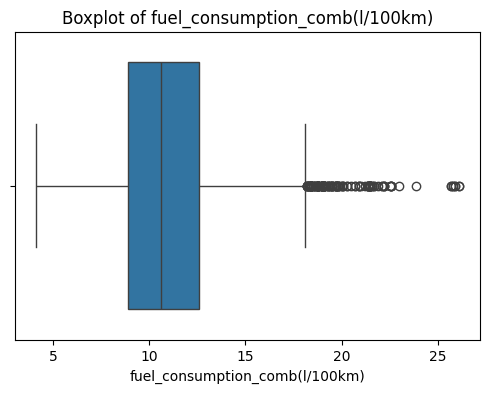

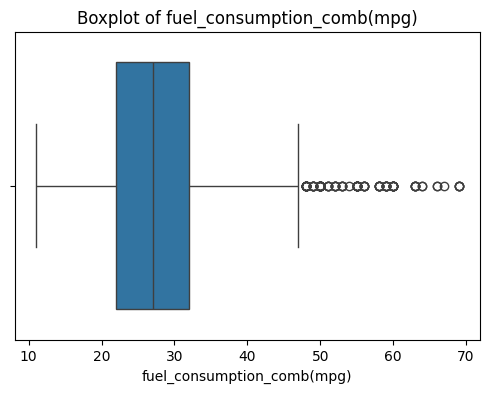

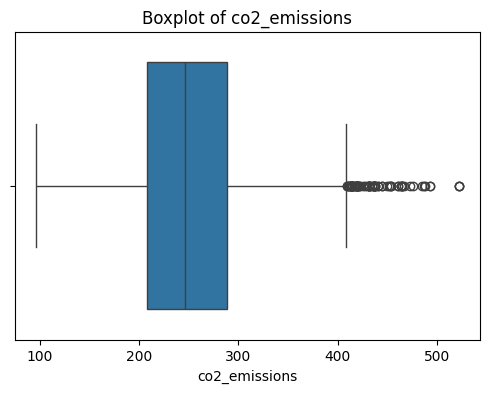

In [45]:
#check for Outliers

# List of numerical columns
num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for all numerical features
plt.figure(figsize=(12, 6))
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### ANOVA Test for Categorical Features

In [ ]:
# Perform ANOVA test for each categorical feature
anova_results = {}
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    groups = [data["co2_emissions"][data[feature] == category].values for category in data[feature].unique()]
    anova_results[feature] = stats.f_oneway(*groups)

# Display the ANOVA results
for feature, result in anova_results.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()

In [ ]:
##  Encode Categorical Variables

In [46]:
# List of categorical columns
categorical_columns = ['make','model','vehicle_class', 'transmission', 'fuel_type']

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display the first few rows of the labeled dataframe
print(data.head())

   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0   1057              0          2.0          4             2   
1     0   1057              0          2.4          4             4   
2     0   1058              0          1.5          4             3   
3     0   1233             11          3.5          6             2   
4     0   1499             11          3.5          6             2   

   fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0          4                    9.9                   6.7   
1          4                   11.2                   7.7   
2          4                    6.0                   5.8   
3          4                   12.7                   9.1   
4          4                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  
0                             8.5                          33            196  
1                             9.6               

In [ ]:
df_labeled=data.copy()

In [ ]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **DATA PREPROCESSING**

### **Clean and transform data for machine learning models**

## 1. Handle Duplicate Data

In [ ]:
#remove duplicate rows 
#data.drop_duplicates(inplace=True)

In [ ]:
data.shape

In [ ]:
data.describe().T

## 3. Handling Outliers

In [47]:
num_col = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']


# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to all numerical columns
for col in num_col:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col} has {len(outliers)} outliers")


engine_size has 137 outliers
cylinders has 196 outliers
fuel_consumption_city has 132 outliers
fuel_consumption_hwy has 208 outliers
fuel_consumption_comb(l/100km) has 142 outliers
fuel_consumption_comb(mpg) has 114 outliers
co2_emissions has 80 outliers


In [ ]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Apply capping to numerical columns
for col in num_col:
    cap_outliers(data, col)
df=data.copy()

In [ ]:
df.describe().T

###  Check skewness of numerical features

In [51]:

# Select only numerical columns

print(f'After removing Outliers')
num_col = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']

#num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness
skewness_values = data[num_col].skew()

# Display skewness values
print("Skewness of numerical columns:\n", skewness_values)

After removing Outliers
Skewness of numerical columns:
 engine_size                       0.809181
cylinders                         1.110415
fuel_consumption_city             0.809005
fuel_consumption_hwy              1.079217
fuel_consumption_comb(l/100km)    0.893316
fuel_consumption_comb(mpg)        0.977034
co2_emissions                     0.526094
dtype: float64


In [52]:
print(f'After Detecing Outliers')    
# Select numerical columns
num_col = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']

#num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE for each numerical column
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f'Distribution & Skewness of {col}')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.legend()
    plt.show()
    


After Detecing Outliers


NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
# Selecting only numerical columns
numerical_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                      'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 
                      'fuel_consumption_comb(mpg)', 'co2_emissions']

#numerical_cols = data.select_dtypes(include=['number']).columns

# Skewness before preprocessing
print("Skewness Before Processing:")
skew_before = data[numerical_cols].skew()
print(skew_before)

# After preprocessing (Example: Removing outliers)
# Assuming you already processed the data and stored it in 'data_cleaned'
print("\nSkewness After Processing:")
skew_after = df[numerical_cols].skew()
print(skew_after)


In [ ]:
df.columns


In [49]:
data[numerical_cols].corr()

NameError: name 'numerical_cols' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient="h")
plt.title("Box Plot of Features After Outlier Removal ")
plt.show()



## 4.Correlation Analysis

In [24]:
data.shape

(7385, 12)

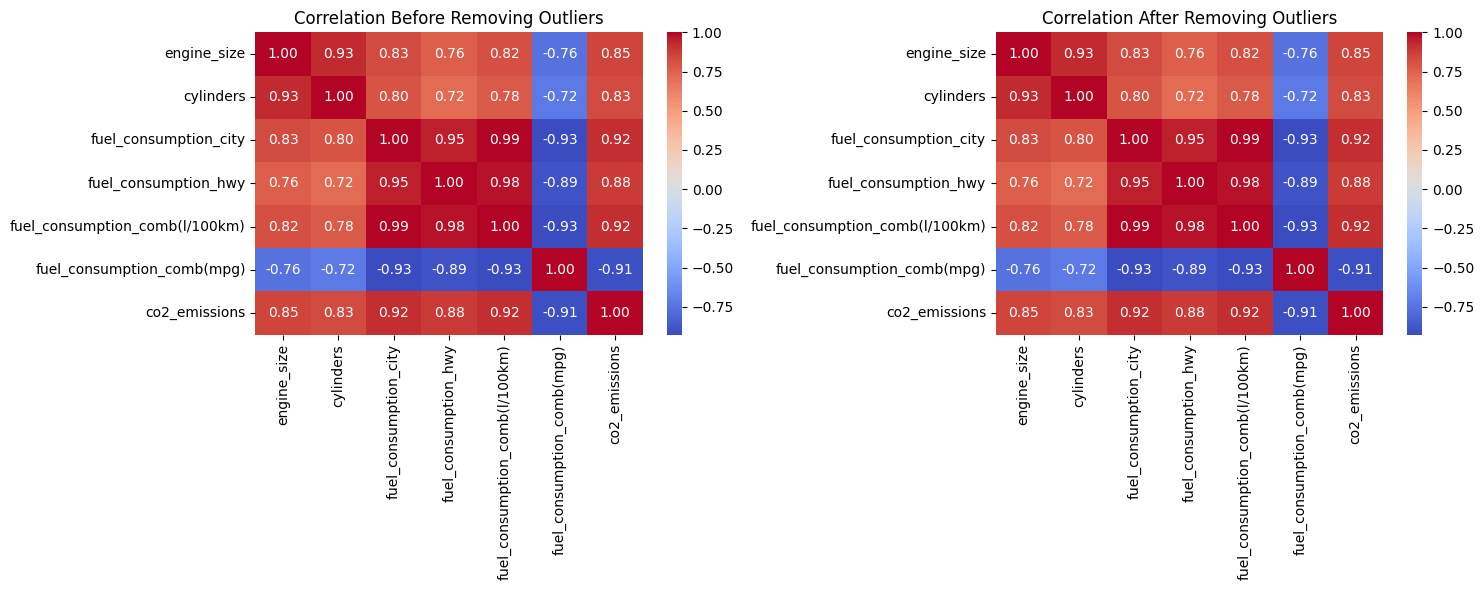

In [53]:
# Select numerical columns only
num_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 
            'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'co2_emissions']

# Compute correlation before removing outliers
corr_before = data[num_cols].corr()

# Compute correlation after removing outliers
corr_after = data[num_cols].corr()

# ------- PLOT HEATMAPS BEFORE & AFTER REMOVING OUTLIERS -------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap before outlier removal
sns.heatmap(corr_before, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Before Removing Outliers")

# Heatmap after outlier removal
sns.heatmap(corr_after, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation After Removing Outliers")

plt.tight_layout()
plt.show()


# **Data Cleaning**

**Drop the Natural Gas category from the fuel_type column since it has only one occurrence. Keeping it may not add any significant value to the model and could introduce noise.**

In [54]:
data_n = data[data['fuel_type'] == 'N']
index=data_n.index
data_n

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [55]:
for i in index:
    data_n.drop(i,axis=0,inplace=True)

In [57]:
dums = pd.get_dummies(data['fuel_type'],prefix='fuel_typeX',drop_first=True)
dums.iloc[0:5]

,fuel_typeX_1,fuel_typeX_2,fuel_typeX_3,fuel_typeX_4
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [59]:
data['fuel_type']=data['fuel_type'].map({'False':0,'True':1})

In [60]:
frames = [data, dums]
result = pd.concat(frames,axis=1)
result.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,fuel_typeX_1,fuel_typeX_2,fuel_typeX_3,fuel_typeX_4
0,0,1057,0,2.0,4,2,NaN,9.9,6.7,8.5,33,196,False,False,False,True
1,0,1057,0,2.4,4,4,NaN,11.2,7.7,9.6,29,221,False,False,False,True
2,0,1058,0,1.5,4,3,NaN,6.0,5.8,5.9,48,136,False,False,False,True
3,0,1233,11,3.5,6,2,NaN,12.7,9.1,11.1,25,255,False,False,False,True
4,0,1499,11,3.5,6,2,NaN,12.1,8.7,10.6,27,244,False,False,False,True


In [61]:
result.drop(['fuel_type'],inplace=True,axis=1)
result.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,fuel_typeX_1,fuel_typeX_2,fuel_typeX_3,fuel_typeX_4
0,0,1057,0,2.0,4,2,9.9,6.7,8.5,33,196,False,False,False,True
1,0,1057,0,2.4,4,4,11.2,7.7,9.6,29,221,False,False,False,True
2,0,1058,0,1.5,4,3,6.0,5.8,5.9,48,136,False,False,False,True
3,0,1233,11,3.5,6,2,12.7,9.1,11.1,25,255,False,False,False,True
4,0,1499,11,3.5,6,2,12.1,8.7,10.6,27,244,False,False,False,True


In [62]:
data_check=data['fuel_type'].value_counts()
data_check

Series([], Name: count, dtype: int64)

**Impact on Model Performance: If Natural Gas vehicles have distinct CO₂ emission patterns, removing them might slightly affect the model's accuracy**

In [63]:
data_corr=data.select_dtypes(include=['float','int']).columns

In [64]:
data[data_corr].corr().T

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
make,1.000000,0.012679,-0.029558,-0.146199,-0.162065,0.154457,NaN,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
model,0.012679,1.000000,0.190713,0.070426,0.048399,-0.005056,NaN,0.101590,0.161755,0.123675,-0.098375,0.105847
vehicle_class,-0.029558,0.190713,1.000000,0.142704,0.105978,-0.121749,NaN,0.240941,0.329828,0.274388,-0.277606,0.286468
engine_size,-0.146199,0.070426,0.142704,1.000000,0.927653,-0.271683,NaN,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,-0.162065,0.048399,0.105978,0.927653,1.000000,-0.270531,NaN,0.800702,0.715252,0.780534,-0.719321,0.832644
transmission,0.154457,-0.005056,-0.121749,-0.271683,-0.270531,1.000000,NaN,-0.285691,-0.284521,-0.288948,0.282694,-0.281682
fuel_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_consumption_city,-0.197389,0.101590,0.240941,0.831379,0.800702,-0.285691,NaN,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_consumption_hwy,-0.126010,0.161755,0.329828,0.761526,0.715252,-0.284521,NaN,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_consumption_comb(l/100km),-0.175238,0.123675,0.274388,0.817060,0.780534,-0.288948,NaN,0.993810,0.977299,1.000000,-0.925576,0.918052


In [65]:
data.isnull().sum()

make                                 0
model                                0
vehicle_class                        0
engine_size                          0
cylinders                            0
transmission                         0
fuel_type                         7385
fuel_consumption_city                0
fuel_consumption_hwy                 0
fuel_consumption_comb(l/100km)       0
fuel_consumption_comb(mpg)           0
co2_emissions                        0
dtype: int64

## 5.Variance Inflation Factor (VIF)

In [ ]:
X=df.iloc[:,[2,3,5,10]]
y=df.iloc[:,11]
# Fit Linear Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuals Calculation
residuals = y - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel("Predicted CO₂ Emissions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# R² Score (Check if Linear Fit is Good)
r2 = r2_score(y, y_pred)
print(f"\n✅ R² Score for Linear Fit: {r2:.4f} (Close to 1 means linear)")

**Interpretation of VIF Values**

VIF < 5 → Low multicollinearity (Good) 

VIF 5-10 → Moderate multicollinearity (Consider removing/reducing) 

VIF > 10 → High multicollinearity (Serious issue, needs fixing)

## 6.Feature Scaling

### **Normalization (Min-Max Scaling)**

In [ ]:
# Select numerical columns
features =  ['engine_size','cylinders','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)']

#Applying Minmaxscalar
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

#check the normalized values
df[features].head()

In [ ]:
df.head()


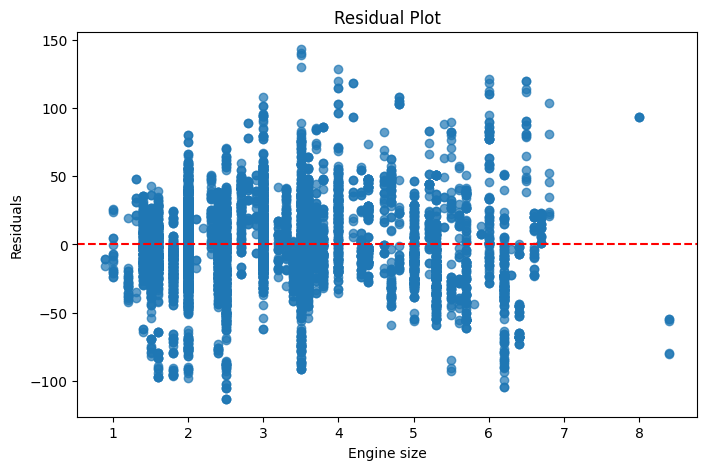

In [68]:
# Fit a simple linear regression model
X = data["engine_size"]
y = data["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(data["engine_size"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Engine size")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
# Fit a simple linear regression model
X = df["cylinders"]
y = df["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(df["cylinders"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Cylinders")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


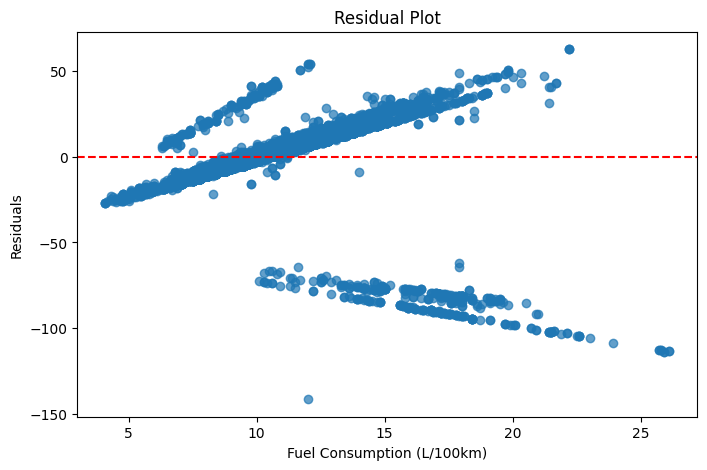

In [70]:
# Fit a simple linear regression model
X = data["fuel_consumption_comb(l/100km)"]
y = data["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(data["fuel_consumption_comb(l/100km)"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
# Fit a simple linear regression model
X = df["fuel_consumption_comb(mpg)"]
y = df["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(df["fuel_consumption_comb(mpg)"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fuel Consumption (mpg)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:

# Fit a simple linear regression model
X = df["fuel_consumption_hwy"]
y = df["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(df["fuel_consumption_hwy"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fuel Consumption (hwy)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


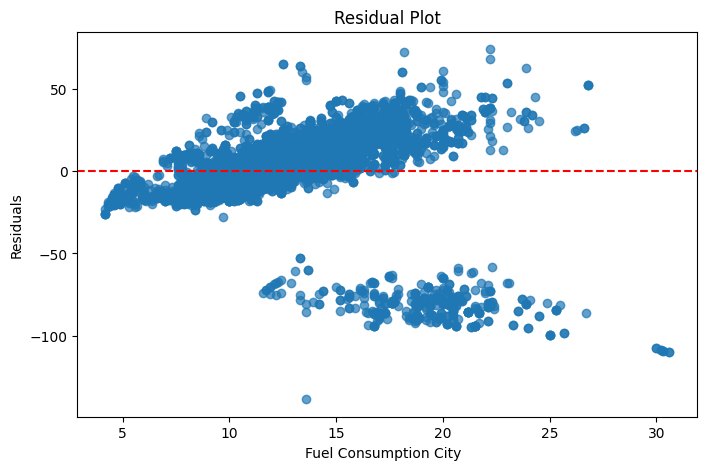

In [71]:

# Fit a simple linear regression model
X = data["fuel_consumption_city"]
y = data["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(data["fuel_consumption_city"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fuel Consumption City  ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

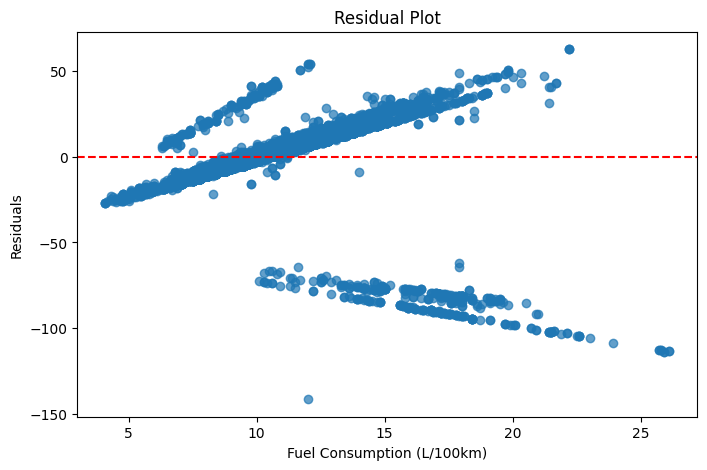

In [73]:
# Fit a simple linear regression model
X = data["fuel_consumption_comb(l/100km)"]
y = data["co2_emissions"]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
residuals = model.resid  # Get residuals

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(data["fuel_consumption_comb(l/100km)"], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fuel Consumption (L/100km)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [74]:
from sklearn.feature_selection import f_classif, f_regression
import pandas as pd

# Select numerical features
X = data.iloc[:,[0,1,2,3,4,5,7,8,9,10]]  # Features
y = data['co2_emissions']  # Target variable

# Perform ANOVA F-test
f_values, p_values = f_regression(X, y)

# Store results in a DataFrame
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by="F-Value", ascending=False)

print("ANOVA F-Test Results:")
print(anova_results)


ANOVA F-Test Results:
                          Feature       F-Value        P-Value
6           fuel_consumption_city  40449.946561   0.000000e+00
8  fuel_consumption_comb(l/100km)  39588.233281   0.000000e+00
9      fuel_consumption_comb(mpg)  34428.660978   0.000000e+00
7            fuel_consumption_hwy  26273.352709   0.000000e+00
3                     engine_size  19410.413548   0.000000e+00
4                       cylinders  16689.019648   0.000000e+00
2                   vehicle_class    660.041500  1.708595e-139
5                    transmission    636.288633  9.583672e-135
0                            make    174.504508   2.144651e-39
1                           model     83.653018   7.502466e-20


In [75]:
from sklearn.feature_selection import RFE
# Step 1: Use Filter Method (ANOVA)
significant_features = anova_results[anova_results['P-Value'] < 0.05]['Feature']

# Step 2: Use Wrapper Method (RFE)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_rfe = rfe.fit_transform(X[significant_features], y)
rfe_selected_features = significant_features[rfe.support_]

# Step 3: Use Embedded Method (LASSO)
lasso = Lasso(alpha=0.1)
lasso.fit(X[rfe_selected_features], y)
lasso_selected_features = rfe_selected_features[lasso.coef_ != 0]

print("Final Selected Features:", list(lasso_selected_features))


Final Selected Features: ['fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)', 'fuel_consumption_hwy', 'engine_size', 'cylinders']


In [77]:
# Select relevant features
selected_features1 = ['engine_size','cylinders','fuel_consumption_comb(mpg)',
                     'fuel_consumption_comb(l/100km)']

# Create a new DataFrame with selected features
X_selected = data[selected_features1]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data)


                          Feature        VIF
0                     engine_size  54.490469
1                       cylinders  75.302616
2      fuel_consumption_comb(mpg)   5.930717
3  fuel_consumption_comb(l/100km)  31.235649


## 7. Split Data for Training & Testing 

In [78]:
X=data[['engine_size','cylinders','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)']]
y=data['co2_emissions']
X.shape,y.shape

((7385, 4), (7385,))

In [79]:
X.head()

,engine_size,cylinders,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg)
0,2.0,4,8.5,33
1,2.4,4,9.6,29
2,1.5,4,5.9,48
3,3.5,6,11.1,25
4,3.5,6,10.6,27


In [80]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: co2_emissions, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((5908, 4), (1477, 4), (5908,), (1477,))

# **MODEL SELECTION**

## **Train the Models & Models Evaluation**

**Fit the selected model to the training data & Assess model performance using metrics**

In [83]:
# Function to compute train and test metrics
def train_val(y_train, y_train_pred, y_test, y_pred, models_name):
    scores = {
        models_name + '_train': { 
            "MAE": mean_absolute_error(y_train, y_train_pred),
            "MSE": mean_squared_error(y_train, y_train_pred),
            "R² Score": r2_score(y_train, y_train_pred),
            "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
            "Mean Difference": np.mean(abs(y_train - y_train_pred))
        },
        models_name + '_test': {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "R² Score": r2_score(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "Mean Difference": np.mean(abs(y_test - y_pred))
        }
    }
    return pd.DataFrame.from_dict(scores, orient='index')  

# Dictionary to store model scores
models_scores = {}

# Cross-validation function
def cross_val(models, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(models, X, y, cv=kf, scoring='r2')
    return np.mean(cv_scores), np.std(cv_scores)  # Return mean and std deviation

# Train-test split (Ensure y is 1D)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

# ======= Linear Regression =======
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
models_scores["Linear Regression"] = train_val(y_train, y_train_pred_lr, y_test, y_pred_lr, "Linear")
cv_mean_lr, cv_std_lr = cross_val(lr, X_train, y_train)

# ======= Random Forest Regression =======
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)
models_scores["Random Forest"] = train_val(y_train, y_train_pred_rf, y_test, y_pred_rf, "RandomForest")
cv_mean_rf, cv_std_rf = cross_val(rf, X_train, y_train)

# ======= Support Vector Regression (SVM) =======
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_train_pred_svr = svr.predict(X_train)
y_pred_svr = svr.predict(X_test)
models_scores["Support Vector Machine"] = train_val(y_train, y_train_pred_svr, y_test, y_pred_svr, "SVR")
cv_mean_svr, cv_std_svr = cross_val(svr, X_train, y_train)

# ======= K-Nearest Neighbors (KNN) Regression =======
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)
models_scores["K-Nearest Neighbors"] = train_val(y_train, y_train_pred_knn, y_test, y_pred_knn, "KNN")
cv_mean_knn, cv_std_knn = cross_val(knn, X_train, y_train)

# ======= Print All Scores =======
for models_name, score_df in models_scores.items():
    print(f"\n Model: {models_name}")
    print(score_df)

# ======= Print Cross-Validation Scores =======
cv_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR", "KNN"],
    "CV Mean R²": [cv_mean_lr, cv_mean_rf, cv_mean_svr, cv_mean_knn],
    "CV Std Dev": [cv_std_lr, cv_std_rf, cv_std_svr, cv_std_knn]
})

print("\n Cross-Validation Results:")
print(cv_results.round(4))  # Round results for readability



 Model: Linear Regression
                    MAE         MSE  R² Score       RMSE  Mean Difference
Linear_train  11.427166  330.301688  0.903380  18.174204        11.427166
Linear_test   11.676076  342.600757  0.900396  18.509478        11.676076

 Model: Random Forest
                         MAE         MSE  R² Score       RMSE  Mean Difference
RandomForest_train  2.616179   33.716582  0.990137   5.806598         2.616179
RandomForest_test   4.064251  102.457039  0.970213  10.122106         4.064251

 Model: Support Vector Machine
                MAE         MSE  R² Score       RMSE  Mean Difference
SVR_train  8.892278  382.319518  0.888163  19.552993         8.892278
SVR_test   9.441001  394.173707  0.885402  19.853808         9.441001

 Model: K-Nearest Neighbors
                MAE         MSE  R² Score       RMSE  Mean Difference
KNN_train  3.486459   66.855789  0.980443   8.176539         3.486459
KNN_test   4.460799  114.177360  0.966805  10.685381         4.460799

 Cross-Va

# **Visualization of Model Performance**

**We can use various plots to visualize the model performance**

## 1. Residual Plot (Errors for Each Model)

*****Residuals = Actual - Predicted. A good model has randomly scattered residuals around zero*****.

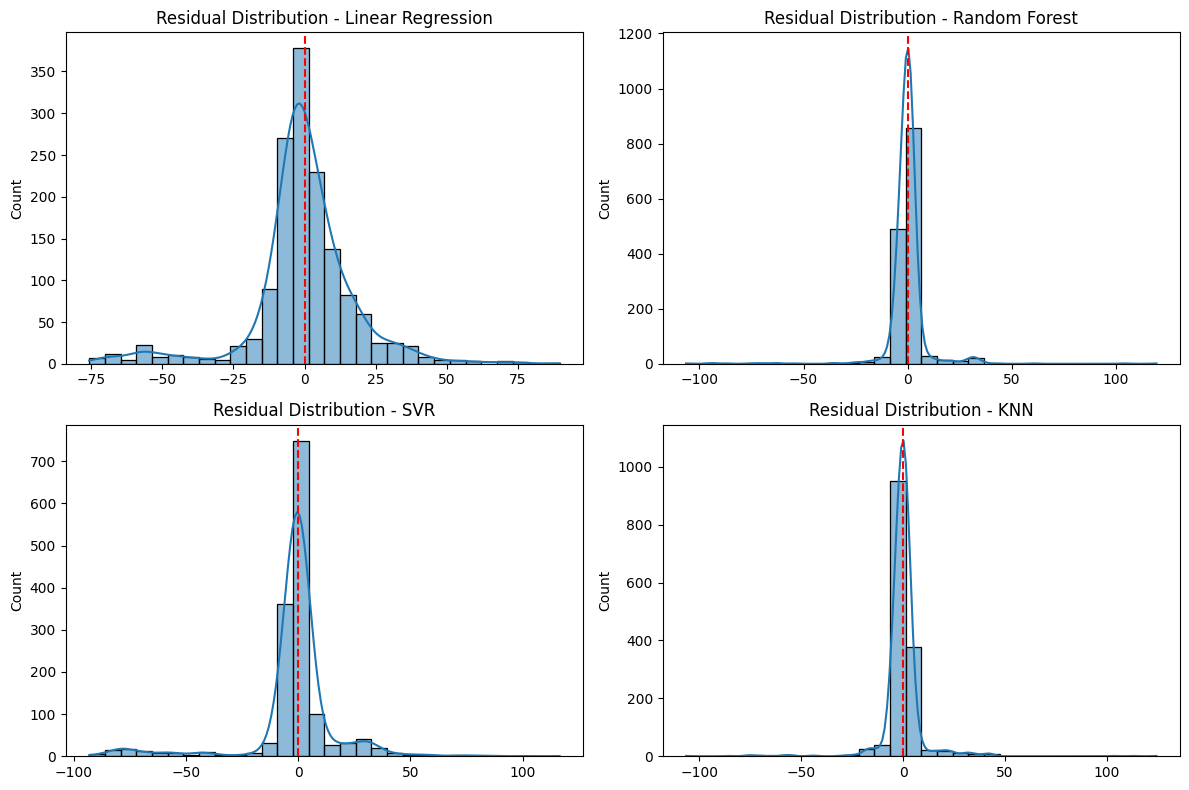

In [84]:
m1 = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn
}

plt.figure(figsize=(12, 8))
for i, (model_name, y_pred) in enumerate(m1.items(), 1):
    plt.subplot(2, 2, i)
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
    plt.title(f"Residual Distribution - {model_name}")

plt.tight_layout()
plt.show()


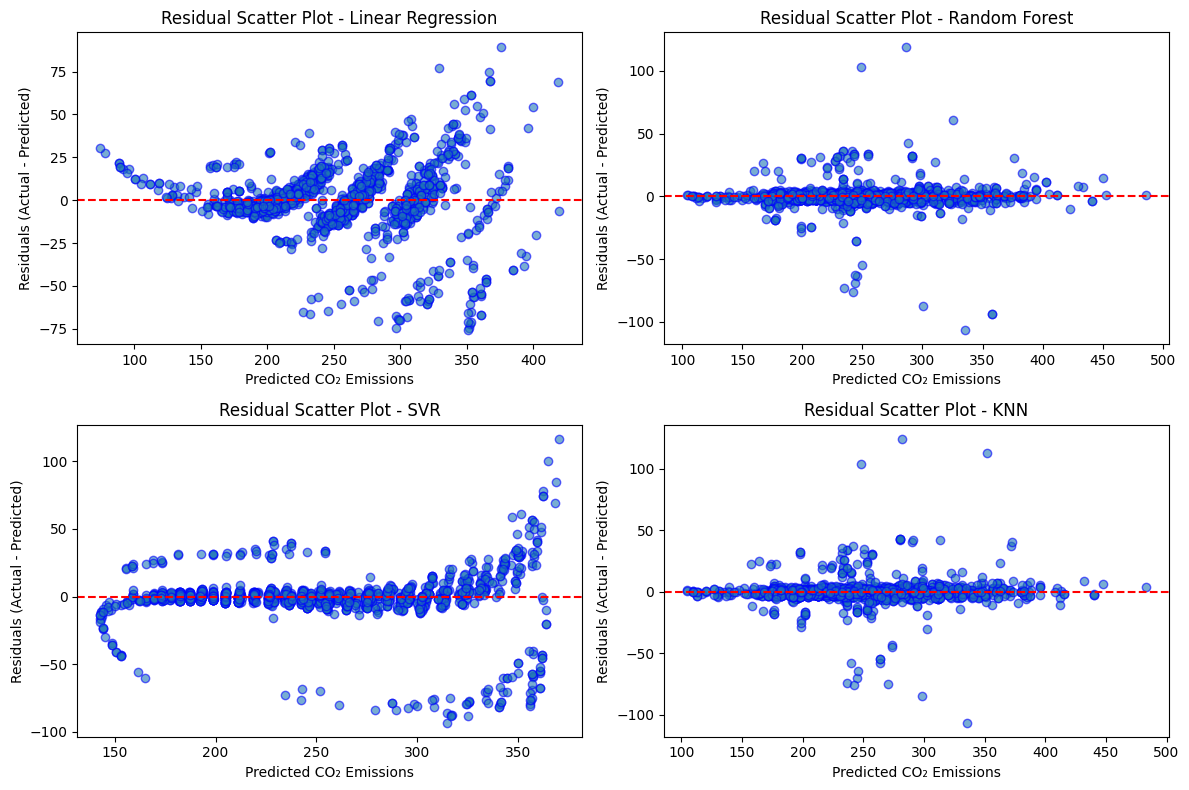

In [85]:
m2 = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn
}

plt.figure(figsize=(12, 8))
for i, (model_name, y_pred) in enumerate(m2.items(), 1):
    plt.subplot(2, 2, i)
    residuals = y_test - y_pred  # Calculate residuals (actual - predicted)
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='b')
    plt.axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)  # Horizontal line at zero
    plt.xlabel("Predicted CO₂ Emissions")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Scatter Plot - {model_name}")

plt.tight_layout()
plt.show()


 ## 2. Actual vs. Predicted Plot (Scatter Plot for Each Model)

*****This plot helps compare actual and predicted values. Ideally, points should align along the diagonal line (y = x)*****

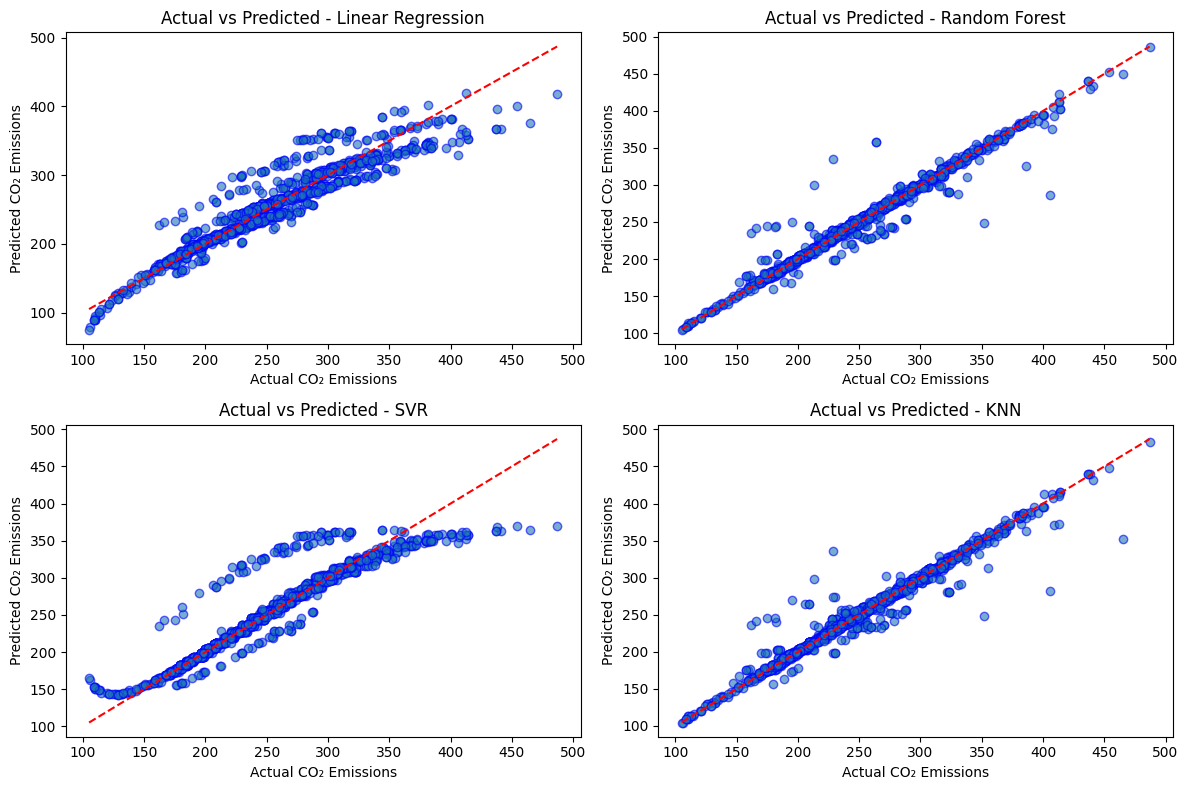

In [86]:
plt.figure(figsize=(12, 8))
for i, (model_name, y_pred) in enumerate(m1.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='b')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
    plt.xlabel("Actual CO₂ Emissions")
    plt.ylabel("Predicted CO₂ Emissions")
    plt.title(f"Actual vs Predicted - {model_name}")

plt.tight_layout()
plt.show()



## 3. Error Distribution for Each Model

*****Understanding how errors are distributed helps identify bias*****.

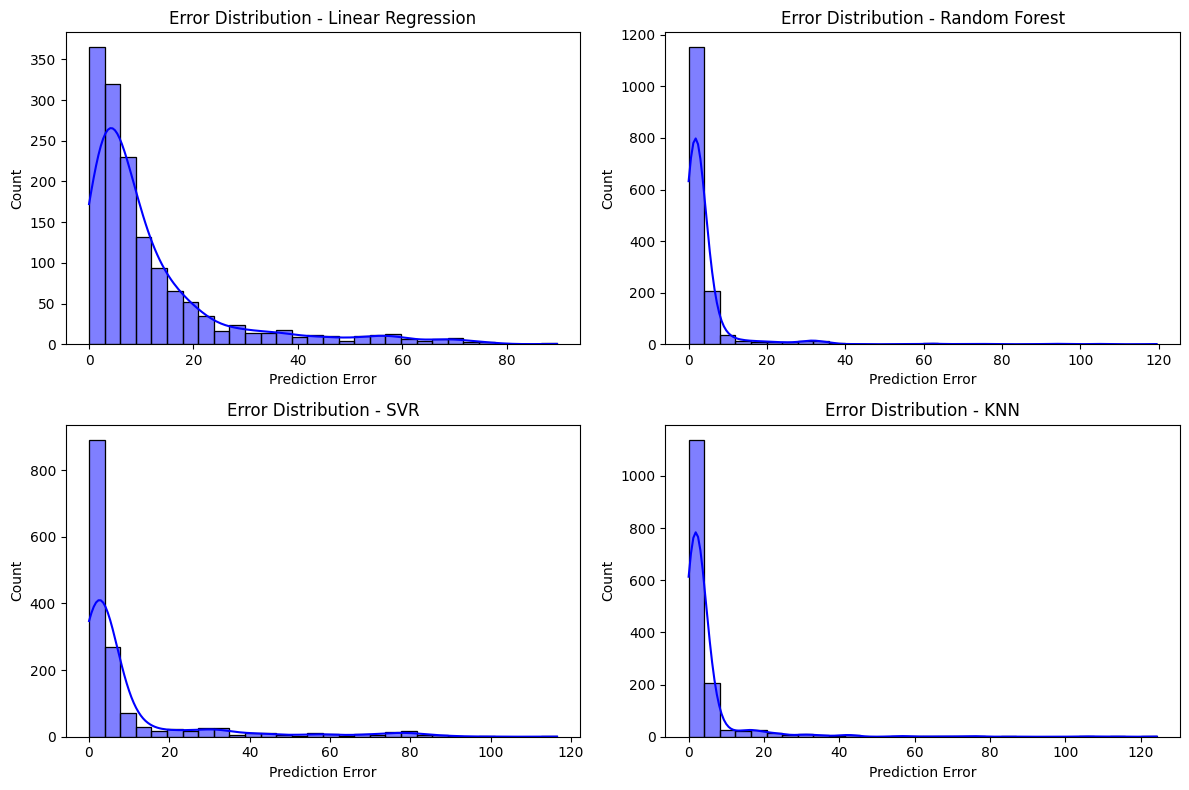

In [87]:
plt.figure(figsize=(12, 8))
for i, (model_name, y_pred) in enumerate(m2.items(), 1):
    plt.subplot(2, 2, i)
    errors = abs(y_test - y_pred)
    sns.histplot(errors, kde=True, bins=30, color="blue")
    plt.xlabel("Prediction Error")
    plt.title(f"Error Distribution - {model_name}")

plt.tight_layout()
plt.show()


# **Hyperparameter Tuning (Optimization)**

**To Improve model performance , we can use GridSearchCV or RandomizedSearchCV to find the Besy Hyperparameters.**

 ### **Random Forest Regressor**

In [88]:
rf_params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=20,  # Number of combinations to try
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


### **Support Vector Regressor (SVR)**

In [89]:
svr_params = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

svr_random = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=svr_params,
    n_iter=15,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

svr_random.fit(X_train, y_train)
best_svr = svr_random.best_estimator_
print("Best SVR Params:", svr_random.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

### **K-Nearest Neighbors (KNN)**

In [104]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_random = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knn_params,
    n_iter=10,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

knn_random.fit(X_train, y_train)
best_knn = knn_random.best_estimator_
print("Best KNN Params:", knn_random.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

# **Implementing the Best Hyperparameters in Models**

**Now that we have tuned our models using RandomizedSearchCV, we can update the models with the best hyperparameters found.**

### **Update Random Forest Regressor**

In [103]:
# Best hyperparameters from RandomizedSearchCV
rf_best_params = rf_random.best_params_

rf = RandomForestRegressor(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf'],
    random_state=42
)

rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_test)

# Store scores
models_scores["Random Forest (Tuned)"] = train_val(y_train, y_train_pred_rf, y_test, y_pred_rf, "RandomForest_Tuned")
cv_mean_rf, cv_std_rf = cross_val(rf, X_train, y_train)


### **Update Support Vector Regressor (SVR)**

In [102]:
# Best hyperparameters from RandomizedSearchCV
svr_best_params = svr_random.best_params_

svr = SVR(
    kernel=svr_best_params['kernel'],
    C=svr_best_params['C'],
    gamma=svr_best_params['gamma']
)

svr.fit(X_train, y_train)
y_train_pred_svr = svr.predict(X_train)
y_pred_svr = svr.predict(X_test)

# Store scores
models_scores["Support Vector Machine (Tuned)"] = train_val(y_train, y_train_pred_svr, y_test, y_pred_svr, "SVR_Tuned")
cv_mean_svr, cv_std_svr = cross_val(svr, X_train, y_train)


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

### **Update K-Nearest Neighbors (KNN)**

In [101]:
# Best hyperparameters from RandomizedSearchCV
knn_best_params = knn_random.best_params_

knn = KNeighborsRegressor(
    n_neighbors=knn_best_params['n_neighbors'],
    weights=knn_best_params['weights'],
    metric=knn_best_params['metric']
)

knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

# Store scores
models_scores["K-Nearest Neighbors (Tuned)"] = train_val(y_train, y_train_pred_knn, y_test, y_pred_knn, "KNN_Tuned")
cv_mean_knn, cv_std_knn = cross_val(knn, X_train, y_train)


NameError: name 'knn_random' is not defined

### **Print Updated Results**

In [100]:
# Print scores for tuned models
for models_names, score_df in models_scores.items():
    print(f"\n Model: {models_names}")
    print(score_df)

# Print cross-validation scores for tuned models
cv_results = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "SVR (Tuned)", "KNN (Tuned)"],
    "CV Mean R²": [cv_mean_rf, cv_mean_svr, cv_mean_knn],
    "CV Std Dev": [cv_std_rf, cv_std_svr, cv_std_knn]
})

print("\n Cross-Validation Results (Tuned Models):")
print(cv_results.round(4))



 Model: Linear Regression
                    MAE         MSE  R² Score       RMSE  Mean Difference
Linear_train  11.427166  330.301688  0.903380  18.174204        11.427166
Linear_test   11.676076  342.600757  0.900396  18.509478        11.676076

 Model: Random Forest
                         MAE         MSE  R² Score       RMSE  Mean Difference
RandomForest_train  2.616179   33.716582  0.990137   5.806598         2.616179
RandomForest_test   4.064251  102.457039  0.970213  10.122106         4.064251

 Model: Support Vector Machine
                MAE         MSE  R² Score       RMSE  Mean Difference
SVR_train  8.892278  382.319518  0.888163  19.552993         8.892278
SVR_test   9.441001  394.173707  0.885402  19.853808         9.441001

 Model: K-Nearest Neighbors
                MAE         MSE  R² Score       RMSE  Mean Difference
KNN_train  3.486459   66.855789  0.980443   8.176539         3.486459
KNN_test   4.460799  114.177360  0.966805  10.685381         4.460799

 Model: P

### **Train Polynomial Regression with Different Degrees**

In [99]:
# Function to evaluate polynomial regression for different degrees
def evaluate_polynomial_regression(degree):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)

    # Store scores
    model_name = f"Polynomial (Degree {degree})"
    models_scores[model_name] = train_val(y_train, y_train_pred, y_test, y_test_pred, model_name)

    # Cross-validation
    cv_mean = np.mean(cross_val_score(poly_model, X_train, y_train, cv=5, scoring='r2'))
    cv_std = np.std(cross_val_score(poly_model, X_train, y_train, cv=5, scoring='r2'))
    
    return cv_mean, cv_std, poly_model


### **Test Different Polynomial Degrees**

In [98]:
cv_results_poly = []
best_poly_model = None
best_r2 = float('-inf')

for degree in range(1, 5):  # Test degrees from 1 to 4
    cv_mean, cv_std, poly_model = evaluate_polynomial_regression(degree)
    
    # Store results
    cv_results_poly.append({"Degree": degree, "CV Mean R²": cv_mean, "CV Std Dev": cv_std})

    # Track the best polynomial model
    if cv_mean > best_r2:
        best_r2 = cv_mean
        best_poly_model = poly_model


NameError: name 'evaluate_polynomial_regression' is not defined

### **Display Results**

In [97]:
cv_results_poly_df = pd.DataFrame(cv_results_poly)
print("\n Polynomial Regression Cross-Validation Results:")
print(cv_results_poly_df.round(4))

# Best degree based on cross-validation
best_degree = cv_results_poly_df.loc[cv_results_poly_df["CV Mean R²"].idxmax(), "Degree"]
print(f"\n🔹 Best Polynomial Degree: {best_degree}")


NameError: name 'cv_results_poly' is not defined

## **Implementing the Best Polynomial Regression Model (Degree = 4) in the Tuned Model Workflow**

**Now that we have determined that Polynomial Regression with Degree 4 gives the best performance, we will integrate it into the tuned model pipeline and compare it with Random Forest, KNN, and SVR.**

### **Train the Best Polynomial Regression Model**

In [96]:
# Create and train the best polynomial model
best_poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
best_poly_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred_poly = best_poly_model.predict(X_train)
y_test_pred_poly = best_poly_model.predict(X_test)

# Store model evaluation scores
models_scores["Polynomial Regression (Tuned)"] = train_val(y_train, y_train_pred_poly, y_test, y_test_pred_poly, "Polynomial_Tuned")

# Cross-validation scores for Polynomial Regression
cv_mean_poly = np.mean(cross_val_score(best_poly_model, X_train, y_train, cv=5, scoring='r2'))
cv_std_poly = np.std(cross_val_score(best_poly_model, X_train, y_train, cv=5, scoring='r2'))


# **Final tuned Models**

## **Compare  Polynomial Regression with Tuned Models**

In [1]:
cv_results = pd.DataFrame({
    "Model": ["Linear Regression","Random Forest (Tuned)","SVR (Tuned)","KNN (Tuned)", "Polynomial Regression (Tuned)"],
    "CV Mean R²": [cv_mean_lr, cv_mean_rf,cv_mean_svr, cv_mean_knn, cv_mean_poly],
    "CV Std Dev": [cv_std_lr, cv_std_rf,cv_std_svr, cv_std_knn, cv_std_poly]
})

print("\n Cross-Validation Results for All Tuned Models:")
print(cv_results.round(4))


NameError: name 'pd' is not defined

# **Visualizing Performance**

**Now that we have optimized our models, let's visualize their predictions**

### **Scatter Plot (Actual vs. Predicted)**

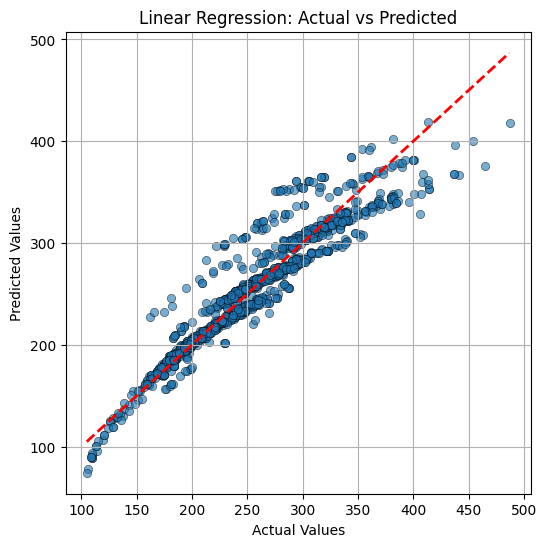

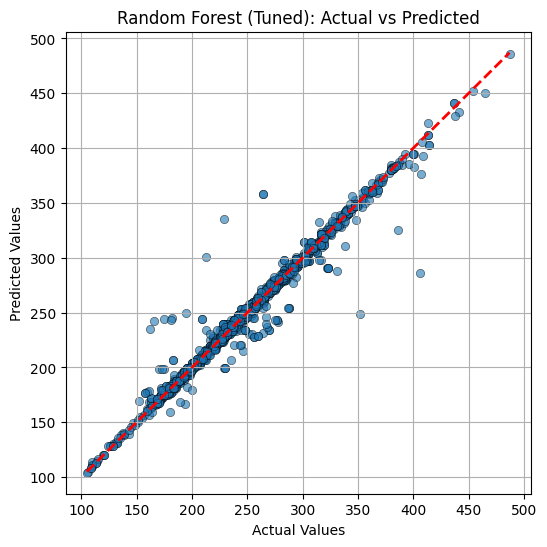

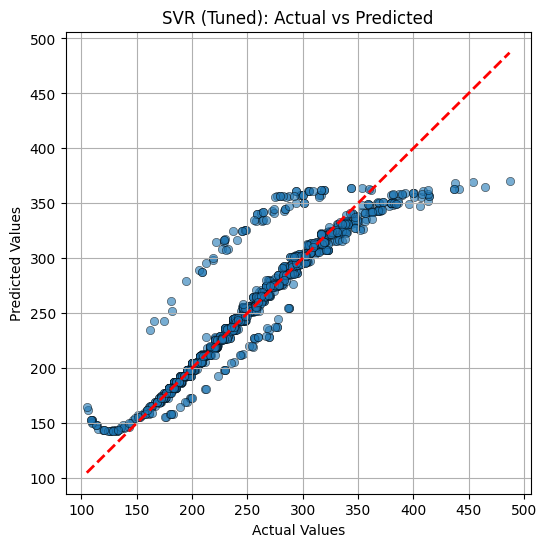

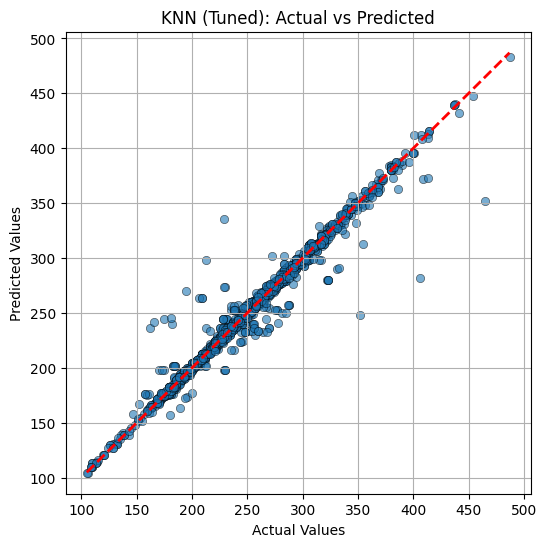

NameError: name 'y_test_pred_poly' is not defined

In [91]:
def plot_actual_vs_pred(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Perfect fit line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.grid()
    plt.show()

# Plot for best models
plot_actual_vs_pred(y_test, y_pred_lr, "Linear Regression")
plot_actual_vs_pred(y_test, y_pred_rf, "Random Forest (Tuned)")
plot_actual_vs_pred(y_test, y_pred_svr, "SVR (Tuned)")
plot_actual_vs_pred(y_test, y_pred_knn, "KNN (Tuned)")
plot_actual_vs_pred(y_test, y_test_pred_poly, "Polynomial Regression (Tuned, Degree 4)")

### **Residual Distribution**

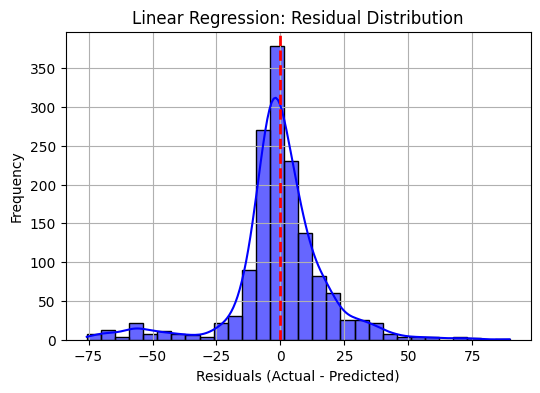

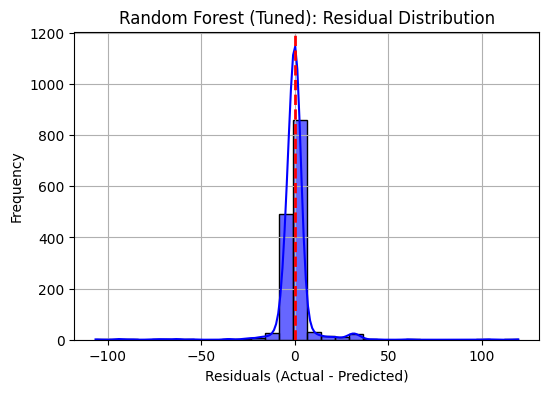

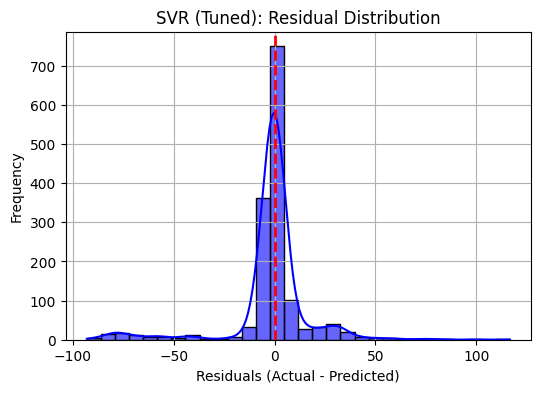

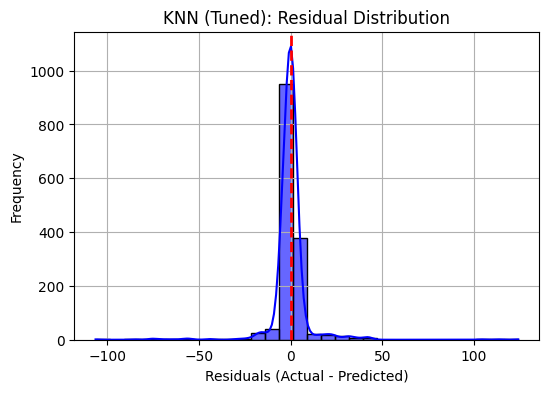

NameError: name 'y_test_pred_poly' is not defined

In [90]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30, color="blue", alpha=0.6)
    plt.axvline(0, color='red', linestyle='dashed', linewidth=2)  # Zero residual line
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.title(f"{model_name}: Residual Distribution")
    plt.grid()
    plt.show()

# Plot residuals for best models
plot_residuals(y_test,y_pred_lr,"Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest (Tuned)")
plot_residuals(y_test, y_pred_svr, "SVR (Tuned)")
plot_residuals(y_test, y_pred_knn, "KNN (Tuned)")
plot_residuals(y_test, y_test_pred_poly, "Polynomial Regression (Tuned, Degree 4)")

###  **Box Plot Comparison of Errors**

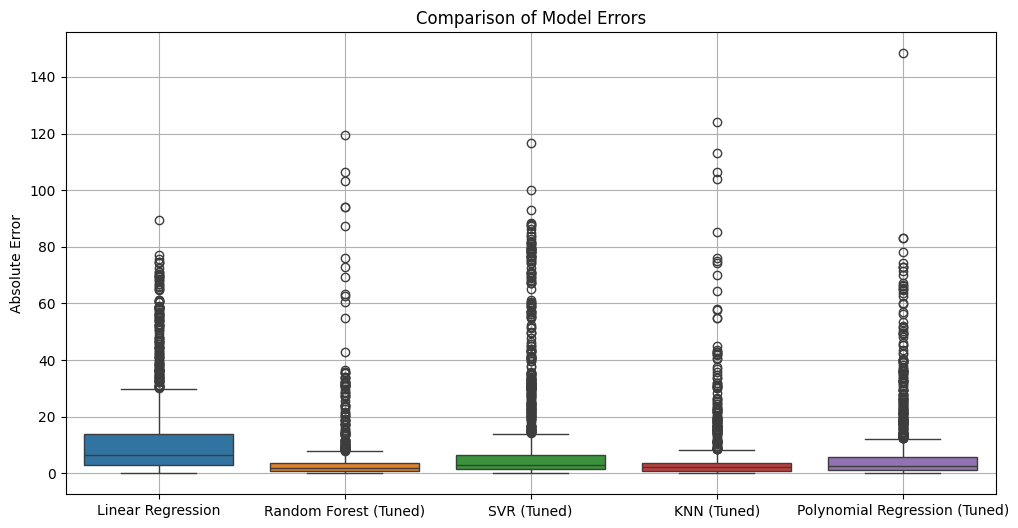

In [105]:
errors_df = pd.DataFrame({
    "Linear Regression": abs(y_test - y_pred_lr),
    "Random Forest (Tuned)": abs(y_test - y_pred_rf),
    "SVR (Tuned)": abs(y_test - y_pred_svr),
    "KNN (Tuned)": abs(y_test - y_pred_knn),
    "Polynomial Regression (Tuned)":abs(y_test - y_test_pred_poly)

})

plt.figure(figsize=(12, 6))
sns.boxplot(data=errors_df)
plt.ylabel("Absolute Error")
plt.title("Comparison of Model Errors")
plt.grid()
plt.show()


# **MODEL DEPLOYMENT**